# New Tutorial for testing interface of Delight with RAIL in Vera C. Rubin Obs context (LSST) 

## Getting started with Delight and LSST


- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNRS
- creation date : January 22 2022



**test delight.interface.rail** : adaptation of the original tutorial on SDSS and Getting started.


- run at NERSC with **desc-python** python kernel.


Instruction to have a **desc-python** environnement:
- https://confluence.slac.stanford.edu/display/LSSTDESC/Getting+Started+with+Anaconda+Python+at+NERSC


This environnement is a clone from the **desc-python** environnement where package required in requirements can be addded according the instructions here
- https://github.com/LSSTDESC/desc-python/wiki/Add-Packages-to-the-desc-python-environment

We will use the parameter file "tmps/parametersTestRail.cfg".
This contains a description of the bands and data to be used.
In this example we will generate mock data for the ugrizy LSST bands,
fit each object with our GP using ugi bands only and see how it predicts the rz bands.
This is an example for filling in/predicting missing bands in a fully bayesian way
with a flexible SED model quickly via our photo-z GP.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import sys,os
sys.path.append('../')
from delight.io import *
from delight.utils import *
from delight.photoz_gp import PhotozGP

In [2]:
from delight.interfaces.rail.makeConfigParam import makeConfigParam

In [3]:
!pwd

/global/u1/d/dagoret/mydesc/Delight/notebooks


In [4]:
cd ../.

/global/u1/d/dagoret/mydesc/Delight


In [5]:
!pwd

/global/u1/d/dagoret/mydesc/Delight


In [6]:
#%cd Delight

# Make config parameters

- now parameters are generated in a dictionnary

In [7]:
input_param = {}
input_param["bands_names"]    = "lsst_u lsst_g lsst_r lsst_i lsst_z lsst_y"
input_param["bands_path"]     = "data/FILTERS"
input_param["bands_fmt"]      = "res"
input_param["bands_numcoefs"] = 15
input_param["bands_verbose"]  = "True"
input_param["bands_debug"]    = "True"
input_param["bands_makeplots"]= "False"

input_param['sed_path']      = "data/CWW_SEDs" 
input_param['sed_name_list'] = "El_B2004a Sbc_B2004a Scd_B2004a SB3_B2004a SB2_B2004a Im_B2004a ssp_25Myr_z008 ssp_5Myr_z008"
input_param['sed_fmt']       = "dat"
input_param['prior_t_list']  = "0.27 0.26 0.25 0.069 0.021 0.11 0.0061 0.0079"
input_param['prior_zt_list'] = "0.23 0.39 0.33 0.31 1.1 0.34 1.2 0.14"
input_param['lambda_ref']    = "4.5e3"

input_param['tempdir']             = "./tmpsim"
input_param["tempdatadir"]         = "./tmpsim/delight_data"
input_param['train_refbandorder']  = "lsst_u lsst_u_var lsst_g lsst_g_var lsst_r lsst_r_var lsst_i lsst_i_var lsst_z lsst_z_var lsst_y lsst_y_var redshift"
input_param['train_refband']       = "lsst_i"
input_param['train_fracfluxerr']   = "1e-4"
input_param['train_xvalidate']     = "False"
input_param['train_xvalbandorder'] = "_ _ _ _ lsst_r lsst_r_var _ _ _ _ _ _"

input_param['target_refbandorder']  = "lsst_u lsst_u_var lsst_g lsst_g_var lsst_r lsst_r_var lsst_i lsst_i_var lsst_z lsst_z_var lsst_y lsst_y_var redshift"
input_param['target_refband']       = "lsst_r"
input_param['target_fracfluxerr']   = "1e-4"

input_param["zPriorSigma"]   = "0.2"
input_param["ellPriorSigma"] = "0.5"
input_param["fluxLuminosityNorm"] = "1.0"
input_param["alpha_C"]        = "1.0e3"
input_param["V_C"]            = "0.1"
input_param["alpha_L"]        = "1.0e2"
input_param["V_L"]            = "0.1"
input_param["lineWidthSigma"] = "20"

input_param["dlght_redshiftMin"]   = "0.1"
input_param["dlght_redshiftMax"]   = "1.101"
input_param["dlght_redshiftNumBinsGPpred"]  = "100"
input_param["dlght_redshiftBinSize"]        = "0.01"
input_param["dlght_redshiftDisBinSize"]     = "0.2"

- **makeConfigParam** generate a long string defining required parameters

In [8]:
paramfile_txt = makeConfigParam("data",input_param)

2022-01-22 05:16:05,026 __main__.py delight.interfaces.rail.makeConfigParam[26348] DEBUG __name__:delight.interfaces.rail.makeConfigParam
2022-01-22 05:16:05,027 __main__.py delight.interfaces.rail.makeConfigParam[26348] DEBUG __file__/global/homes/d/dagoret/mydesc/mydesc/lib/python3.8/site-packages/delight-1.0.1-py3.8-linux-x86_64.egg/delight/interfaces/rail/makeConfigParam.py
2022-01-22 05:16:05,027 __main__.py delight.interfaces.rail.makeConfigParam[26348] INFO ----- makeConfigParam ------
2022-01-22 05:16:05,028 __main__.py delight.interfaces.rail.makeConfigParam[26348] DEBUG  received path = data
2022-01-22 05:16:05,028 __main__.py delight.interfaces.rail.makeConfigParam[26348] DEBUG Decode redshift parameter from RAIL config file


In [9]:
print(paramfile_txt)


# DELIGHT parameter file
# Syntactic rules:
# - You can set parameters with : or =
# - Lines starting with # or ; will be ignored
# - Multiple values (band names, band orders, confidence levels)
#   must beb separated by spaces
# - The input files should contain numbers separated with spaces.
# - underscores mean unused column

[Bands]
names: lsst_u lsst_g lsst_r lsst_i lsst_z lsst_y
directory: data/FILTERS
bands_fmt: res
numCoefs: 15
bands_verbose: True
bands_debug: True
bands_makeplots: False

[Templates]
directory: data/CWW_SEDs
names: El_B2004a Sbc_B2004a Scd_B2004a SB3_B2004a SB2_B2004a Im_B2004a ssp_25Myr_z008 ssp_5Myr_z008
sed_fmt: dat
p_t: 0.27 0.26 0.25 0.069 0.021 0.11 0.0061 0.0079
p_z_t: 0.23 0.39 0.33 0.31 1.1 0.34 1.2 0.14
lambdaRef: 4.5e3

[Simulation]
numObjects: 1000
noiseLevel: 0.03
trainingFile: ./tmpsim/delight_data/galaxies-fluxredshifts.txt
targetFile: ./tmpsim/delight_data/galaxies-fluxredshifts2.txt

[Training]
catFile: ./tmpsim/delight_data/galaxies-fluxredshi

## Temporary working dir

**now intermediate file are written in a temporary file:**

- configuration parameter file
- input fluxes
- Template fitting and Gaussian Process parameters
- metrics from running Template fitting and Gaussian Process estimation

In [10]:
# create usefull tempory directory
try:
    if not os.path.exists(input_param["tempdir"]):
        os.makedirs(input_param["tempdir"])
except OSError as e:
    if e.errno != errno.EEXIST:
        msg = "error creating file "+input_param["tempdir"]
        logger.error(msg)
        raise

In [11]:
configfilename     = 'parametersTestRail.cfg'
configfullfilename = os.path.join(input_param['tempdir'],configfilename) 

- **write parameter file**

In [12]:
with open(configfullfilename ,'w') as out:
    out.write(paramfile_txt)

# Filters

- First, we must **fit the band filters with a gaussian mixture**. 
This is done with this script:

In [13]:
from delight.interfaces.rail.processFilters import processFilters

In [14]:
processFilters(configfullfilename)

2022-01-22 05:16:05,057 __main__.py delight.interfaces.rail.processFilters[26348] INFO ----- processFilters ------
2022-01-22 05:16:05,058 __main__.py delight.interfaces.rail.processFilters[26348] INFO parameter file is ./tmpsim/parametersTestRail.cfg


lsst_u lsst_g lsst_r lsst_i lsst_z 

/global/homes/d/dagoret/mydesc/mydesc/lib/python3.8/site-packages/scipy/optimize/minpack.py:476: RuntimeWarning: Number of calls to function has reached maxfev = 6200.
  warnings.warn(errors[info][0], RuntimeWarning)


lsst_y 

# SED

- Second, we will process the library of SEDs and project them onto the filters,
(for the mean fct of the GP) with the following script (which may take a few minutes depending on the settings you set):

In [15]:
from delight.interfaces.rail.processSEDs import processSEDs

In [16]:
processSEDs(configfullfilename)

2022-01-22 05:16:37,850 __main__.py, delight.interfaces.rail.processSEDs[26348] INFO --- Process SED ---


## Manage temporary working data (fluxes and GP params and metrics) directories

In [17]:
try:
    if not os.path.exists(input_param["tempdatadir"]):
        os.makedirs(input_param["tempdatadir"])
except OSError as e:
    if e.errno != errno.EEXIST:
        msg = "error creating file " + input_param["tempdatadir"]
        logger.error(msg)
        raise

# Internal simulation of a mock catalog

Third, we will make some mock data with those filters and SEDs:

In [18]:
from delight.interfaces.rail.simulateWithSEDs import simulateWithSEDs

In [19]:
simulateWithSEDs(configfullfilename)

2022-01-22 05:16:41,110 __main__.py, delight.interfaces.rail.simulateWithSEDs[26348] INFO --- Simulate with SED ---


# Train and apply
Run the scripts below. There should be a little bit of feedback as it is going through the lines.
For up to 1e4 objects it should only take a few minutes max, depending on the settings above.

## Template Fitting

In [20]:
from delight.interfaces.rail.templateFitting import templateFitting

In [21]:
templateFitting(configfullfilename)

2022-01-22 05:16:41,440 __main__.py, delight.interfaces.rail.templateFitting[26348] INFO --- TEMPLATE FITTING ---
2022-01-22 05:16:41,441 __main__.py, delight.interfaces.rail.templateFitting[26348] INFO ==> New Prior calculation from Benitez
2022-01-22 05:16:41,443 __main__.py, delight.interfaces.rail.templateFitting[26348] INFO Thread number / number of threads: 1 , 1
2022-01-22 05:16:41,443 __main__.py, delight.interfaces.rail.templateFitting[26348] INFO Input parameter file:./tmpsim/parametersTestRail.cfg
2022-01-22 05:16:41,454 __main__.py, delight.interfaces.rail.templateFitting[26348] INFO Number of Target Objects 1000
2022-01-22 05:16:41,455 __main__.py, delight.interfaces.rail.templateFitting[26348] INFO Thread 0 , analyzes lines 0 , to 1000


## Gaussian Process

### Trainning

In [22]:
from delight.interfaces.rail.delightLearn import delightLearn

In [23]:
delightLearn(configfullfilename)

2022-01-22 05:16:49,259 __main__.py, delight.interfaces.rail.delightLearn[26348] INFO --- DELIGHT-LEARN ---
2022-01-22 05:16:49,274 __main__.py, delight.interfaces.rail.delightLearn[26348] INFO Number of Training Objects 1000
2022-01-22 05:16:49,275 __main__.py, delight.interfaces.rail.delightLearn[26348] INFO Thread 0 , analyzes lines 0 , to 1000


## Predictions

In [24]:
from delight.interfaces.rail.delightApply import delightApply

In [25]:
delightApply(configfullfilename)

2022-01-22 05:17:00,525 __main__.py, delight.interfaces.rail.delightApply[26348] INFO --- DELIGHT-APPLY ---
2022-01-22 05:17:00,549 __main__.py, delight.interfaces.rail.delightApply[26348] INFO Number of Training Objects 1000
2022-01-22 05:17:00,549 __main__.py, delight.interfaces.rail.delightApply[26348] INFO Number of Target Objects 1000
2022-01-22 05:17:00,550 __main__.py, delight.interfaces.rail.delightApply[26348] INFO Thread 0 , analyzes lines 0 to 1000


0 0.02454400062561035 0.0010967254638671875 0.005803346633911133
100 0.025220632553100586 0.0014977455139160156 0.00708770751953125
200 0.021909475326538086 0.001157522201538086 0.0061321258544921875
300 0.02034139633178711 0.0009942054748535156 0.0067408084869384766
400 0.02205944061279297 0.0012569427490234375 0.0070569515228271484
500 0.021306514739990234 0.00110626220703125 0.0057103633880615234
600 0.022672176361083984 0.0014433860778808594 0.006518840789794922
700 0.0207521915435791 0.0010223388671875 0.00807809829711914
800 0.019287109375 0.0010187625885009766 0.007240772247314453
900 0.018941879272460938 0.0012578964233398438 0.008821964263916016


# Analyze the outputs

In [26]:
# First read a bunch of useful stuff from the parameter file.
params = parseParamFile(configfullfilename, verbose=False)
bandCoefAmplitudes, bandCoefPositions, bandCoefWidths, norms\
    = readBandCoefficients(params)
bandNames = params['bandNames']
numBands, numCoefs = bandCoefAmplitudes.shape
fluxredshifts = np.loadtxt(params['target_catFile'])
fluxredshifts_train = np.loadtxt(params['training_catFile'])
bandIndices, bandNames, bandColumns, bandVarColumns, redshiftColumn,\
            refBandColumn = readColumnPositions(params, prefix='target_')
redshiftDistGrid, redshiftGrid, redshiftGridGP = createGrids(params)
dir_seds = params['templates_directory']
dir_filters = params['bands_directory']
lambdaRef = params['lambdaRef']
sed_names = params['templates_names']
nt = len(sed_names)
f_mod = np.zeros((redshiftGrid.size, nt, len(params['bandNames'])))
for t, sed_name in enumerate(sed_names):
    f_mod[:, t, :] = np.loadtxt(dir_seds + '/' + sed_name + '_fluxredshiftmod.txt')

In [27]:
# Load the PDF files
metricscww = np.loadtxt(params['metricsFile'])
metrics = np.loadtxt(params['metricsFileTemp'])
# Those of the indices of the true, mean, stdev, map, and map_std redshifts.
i_zt, i_zm, i_std_zm, i_zmap, i_std_zmap = 0, 1, 2, 3, 4
i_ze = i_zm
i_std_ze = i_std_zm

pdfs = np.loadtxt(params['redshiftpdfFile'])
pdfs_cww = np.loadtxt(params['redshiftpdfFileTemp'])
pdfatZ_cww = metricscww[:, 5] / pdfs_cww.max(axis=1)
pdfatZ = metrics[:, 5] / pdfs.max(axis=1)
nobj = pdfatZ.size
#pdfs /= pdfs.max(axis=1)[:, None]
#pdfs_cww /= pdfs_cww.max(axis=1)[:, None]
pdfs /= np.trapz(pdfs, x=redshiftGrid, axis=1)[:, None]
pdfs_cww /= np.trapz(pdfs_cww, x=redshiftGrid, axis=1)[:, None]

437 590 999 90 546 46 173 92 871 560 341 575 905 642 25 488 828 837 547 397 

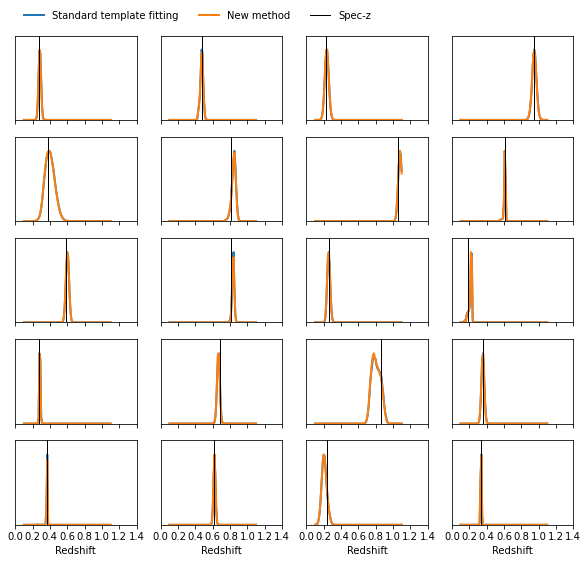

In [32]:
ncol = 4
fig, axs = plt.subplots(5, ncol, figsize=(10, 9), sharex=True, sharey=False)
axs = axs.ravel()
z = fluxredshifts[:, redshiftColumn]
sel = np.random.choice(nobj, axs.size, replace=False)
lw = 2
for ik in range(axs.size):
    k = sel[ik]
    print(k, end=" ")
    axs[ik].plot(redshiftGrid, pdfs_cww[k, :],lw=lw, label='Standard template fitting')# c="#2ecc71", 
    axs[ik].plot(redshiftGrid, pdfs[k, :], lw=lw, label='New method')  #, c="#3498db"
    axs[ik].axvline(fluxredshifts[k, redshiftColumn], c="k", lw=1, label='Spec-z')
    ymax = np.max(np.concatenate((pdfs[k, :], pdfs_cww[k, :])))
    axs[ik].set_ylim([0, ymax*1.2])
    axs[ik].set_xlim([0, 1.1])
    axs[ik].set_yticks([])
    axs[ik].set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4])
for i in range(ncol):
    axs[-i-1].set_xlabel('Redshift', fontsize=10)
axs[0].legend(ncol=3, frameon=False, loc='upper left', bbox_to_anchor=(0.0, 1.4))
#fig.tight_layout()
#fig.subplots_adjust(wspace=0.1, hspace=0.1, top=0.96)


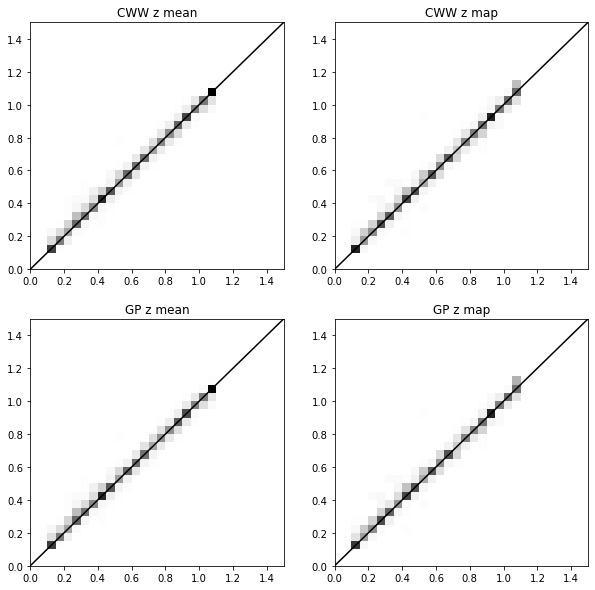

In [33]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
zmax = 1.5
rr = [[0, zmax], [0, zmax]]
nbins = 30
h = axs[0, 0].hist2d(metricscww[:, i_zt], metricscww[:, i_zm], nbins, cmap='Greys', range=rr)
hmin, hmax = np.min(h[0]), np.max(h[0])
axs[0, 0].set_title('CWW z mean')
axs[0, 1].hist2d(metricscww[:, i_zt], metricscww[:, i_zmap], nbins, cmap='Greys', range=rr, vmax=hmax)
axs[0, 1].set_title('CWW z map')
axs[1, 0].hist2d(metrics[:, i_zt], metrics[:, i_zm], nbins, cmap='Greys', range=rr, vmax=hmax)
axs[1, 0].set_title('GP z mean')
axs[1, 1].hist2d(metrics[:, i_zt], metrics[:, i_zmap], nbins, cmap='Greys', range=rr, vmax=hmax)
axs[1, 1].set_title('GP z map')
axs[0, 0].plot([0, zmax], [0, zmax], c='k')
axs[0, 1].plot([0, zmax], [0, zmax], c='k')
axs[1, 0].plot([0, zmax], [0, zmax], c='k')
axs[1, 1].plot([0, zmax], [0, zmax], c='k')
#fig.tight_layout()

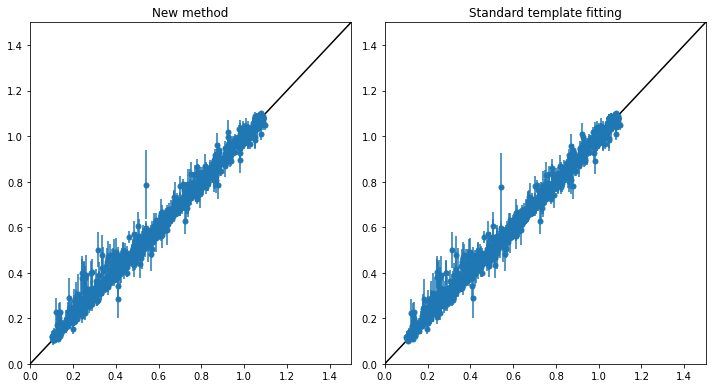

In [36]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5.5))
chi2s = ((metrics[:, i_zt] - metrics[:, i_ze])/metrics[:, i_std_ze])**2

axs[0].errorbar(metrics[:, i_zt], metrics[:, i_ze], yerr=metrics[:, i_std_ze], fmt='o', markersize=5, capsize=0)
axs[1].errorbar(metricscww[:, i_zt], metricscww[:, i_ze], yerr=metricscww[:, i_std_ze], fmt='o', markersize=5, capsize=0)
axs[0].plot([0, zmax], [0, zmax], 'k')
axs[1].plot([0, zmax], [0, zmax], 'k')
axs[0].set_xlim([0, zmax])
axs[1].set_xlim([0, zmax])
axs[0].set_ylim([0, zmax])
axs[1].set_ylim([0, zmax])
axs[0].set_title('New method')
axs[1].set_title('Standard template fitting')

fig.tight_layout()

Text(0.5, 1.0, 'New method')

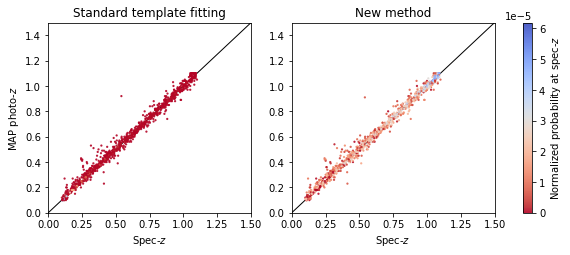

In [31]:
cmap = "coolwarm_r"
vmin = 0.0
alpha = 0.9
s = 5
fig, axs = plt.subplots(1, 2, figsize=(10, 3.5))
vs = axs[0].scatter(metricscww[:, i_zt], metricscww[:, i_zmap], 
                    s=s, c=pdfatZ_cww, cmap=cmap, linewidth=0, vmin=vmin, alpha=alpha)
vs = axs[1].scatter(metrics[:, i_zt], metrics[:, i_zmap], 
                    s=s, c=pdfatZ, cmap=cmap, linewidth=0, vmin=vmin, alpha=alpha)
clb = plt.colorbar(vs, ax=axs.ravel().tolist())
clb.set_label('Normalized probability at spec-$z$')
for i in range(2):
    axs[i].plot([0, zmax], [0, zmax], c='k', lw=1, zorder=0, alpha=1)
    axs[i].set_ylim([0, zmax])
    axs[i].set_xlim([0, zmax])
    axs[i].set_xlabel('Spec-$z$')
axs[0].set_ylabel('MAP photo-$z$')

axs[0].set_title('Standard template fitting')
axs[1].set_title('New method')

## Conclusion
Don't be too harsh with the results of the standard template fitting or the new methods since both have a lot of parameters which can be optimized!

If the results above made sense, i.e. the redshifts are reasonnable for both methods on the mock data, then you can start modifying the parameter files and creating catalog files containing actual data! I recommend using less than 20k galaxies for training, and 1000 or 10k galaxies for the delight-apply script at the moment. Future updates will address this issue.